# Stability most sensitive at $N_S = N_R$

This notebook tries to verify the idea that
$$
\rho \geq \sqrt{\min(N_S/N_R, N_R/N_S)},
$$
is the stability criterion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First sample communities with constant resource supply.

Trial finished. A function for sampling as follows.

In [2]:
def sample(Ns:int,
           Nr:int,
           rho:float):
    
       Tgc = np.random.randn(2, Ns, Nr)

       G = Tgc[0]
       C = rho * Tgc[0] + np.sqrt(1-rho**2) * Tgc[1]
       G = G + 4.0
       C = C + 4.0
       Ss = 0.01 + 0.99*np.random.rand(Ns)
       Rs = 0.01 + 0.99*np.random.rand(Nr)
       l = 0.1 + 0.9*np.random.rand(Nr)

       Js = np.zeros((Ns+Nr,Ns+Nr))
       Js[0:Ns,Ns:Ns+Nr] = np.diag(Ss) @ G
       Js[Ns:Ns+Nr,0:Ns] = - np.diag(Rs) @ C.T
       Js[Ns:Ns+Nr,Ns:Ns+Nr] = - np.diag(C.T @ Ss) - np.diag(l)

       E_J = np.linalg.eigvals(Js)
       E_Jr = E_J.real
       NU_J = len(E_Jr[E_Jr >= 1.0e-8]) # if devided by Nr or Ns

       return NU_J

Want to draw a figure with x-axis being $N_S/N_R$ and y-axis being $\rho$. The color map is number of unstable mode?

Just select a horizental line, $\rho = 0.8$

In [3]:
rho = 0.8
Nr = 512
Ns_span = range(1,Nr*2+1, 32)
NU = np.zeros((len(Ns_span), 50))

for i in range(len(Ns_span)):
    Ns = Ns_span[i]
    for j in range(50):
        NU[i, j] = sample(Ns, Nr, rho)

In [4]:
FNC = np.mean((NU > 0).astype(float), -1)
std_FNC = np.std((NU > 0).astype(float), -1)/np.sqrt(50)

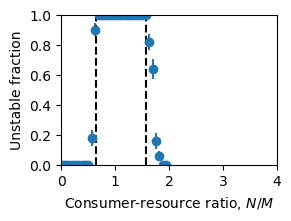

In [5]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)

plt.errorbar(np.array(Ns_span)/Nr, FNC, std_FNC, ls='none', marker = 'o')
#plt.scatter([12/32,1.0,3.0],[0.05 for i in range(3)],c='r',marker='v')

plt.plot([0.8**2 for i in range(11)],[0.1*i for i in range(11)],'--k')
plt.plot([1/0.8**2 for i in range(11)],[0.1*i for i in range(11)],'--k')

plt.ylim(0,1)
plt.xlim(0,4)
#plt.xscale('log')
plt.xlabel('Consumer-resource ratio, $N/M$')
plt.ylabel('Unstable fraction')
plt.savefig('../figures/fig1shift-test15.eps')